## Quinta Lista de Exercícios - OTIMIZACAO NAO LINEAR
**Nome: $\color{red}{\text{Antonio Carlos da Anunciação}}$**

**Matricula: 2018019443**

**Professor: Frederico Gadelha**

**Chapter 7**


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import optimize
from scipy.optimize import Bounds
warnings.filterwarnings('ignore')

#### Problem 7.1

7.1 Find the solution of the problem:
$$f(X) = x_1^{2}+2x_2^{2}-2x_{1}x_{2}-14x_{1}-14x_{2}+10$$
subject to
$$4x_1^{2}+x_2^{2}-25 \leq 0$$
using a graphical procedure.

In [2]:
def F710(x1, x2):
    f = x1**2+2*x2**2-2*x1*x2-14*(x1+x2)+10
    return f

def G710(x1, x2):
    g = 4*x1**2+x2**2 -25
    return g

In [3]:
a1 = np.linspace(-5.5, 5.5, 1000)
a2 = np.linspace(-5.5, 5.5, 1000)
A1, A2 = np.meshgrid(a1, a2)
Z1 = F710(A1, A2)
G2 = G710(A1, A2)

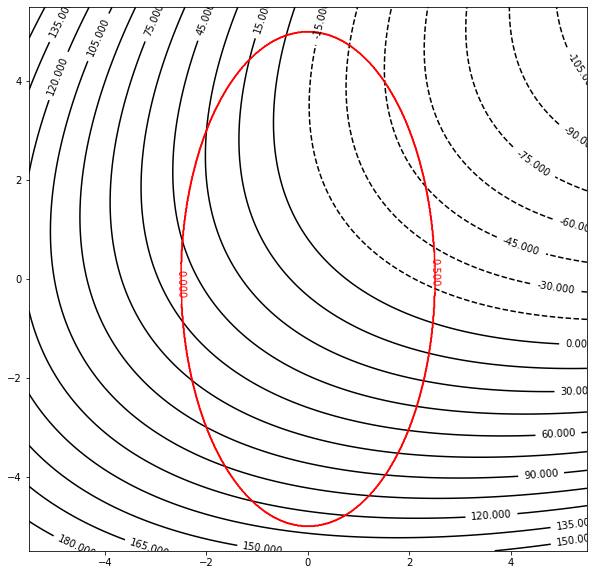

In [4]:
plt.figure(figsize=(10,10))
contours1 = plt.contour(A1, A2, Z1, 25, colors='black')
contours2 = plt.contour(A1, A2, G2 <= 0, 1 , colors='red')
plt.clabel(contours1, inline=True, fontsize=10)
plt.clabel(contours2, inline=True, fontsize=10)
plt.show()

A solução são os valores contindo nas curvas de niveis dentra da região vermelha.

---
#### Problem 7.24:

Construct the φk function according to the exterior penalty function approach and complete
the minimization of φk for the following problem.
$$Minimize f(x) = (x-1)^{2}$$
subject to
$$g_{1}(x) = 2-x \leq 0$$
$$g_{2}(x) = x-4 \leq 0$$

Solution:

$$\phi_{k} = (x-1)^{2}+r_{k}([max(0,2-x)]^2+[max(0,x-4)]^2)$$
$$d\phi_{k}/dx = 2(x-1)+2r_{k}([-max(0,2-x)]+[max(0,x-4)]) = 0$$
$$x*(2+2r_{k})= 2+4r_{k}$$
$$x* = \frac {2+4r_{k}}{2+2r_{k}}$$

$$x*=\lim_{r_{k}\to\infty} \frac {\frac {2}{r_{k}}+4}{\frac {2}{r_{k}}+2}$$
$$x* = 2$$
$$ Min = f(2-1)^2 = 1$$


---
#### Problem 7.31:
Find the solution of the following problem using an exterior penalty function method with
classical method of unconstrained minimization:
$$Minimize f(x_1, x_2) = {(2x_1-x_2)}^{2}+{(x_2+1)}^{2}$$
subject to
$${x_1-x_2}=10$$
Consider the limiting case as rk → ∞ analytically.

Solution:

$$ \phi = (2x_1-x_2)^2+(x_2+1)^2+r(x_1+x_2-10)^2$$
$$ \nabla \phi = [0,0]$$
$$ \nabla \phi = [4(2x_1-x_2)+2r(x_1+x_2-10), -2(2x_1+1)+2r(x_1+x_2-10)] = [20r,20r-2]$$
$$\begin{cases} (4+r)x_1 -(2-r)x_2 = 10r \\ -(2-r)x_1 +(2+r)x_2 = 10r-1 \end{cases}$$
solven to r → ∞
$$x_1* = 4.1 $$
$$x_2* = 5.9 $$
$$f_{min}=53.53$$

---

As proximas questões foram resolvidas usando aproximação quadratica, do scipy:

#### Problem 7.52:
Find the solution of the following problem (known as Rosen–Suzuki problem) using the MATLAB function fmincon with the starting point X1 = {0, 0, 0, 0}T:

Minimize
$$f(X) = x_1^2+x_2^2+2x_3^2-x_4^2-5x_1-5x_2-21x_3+7x_4+100$$
subject to
$$x_1^2+x_2^2+x_3^2+x_4^2+x_1-x_2+x_3-x_4-100 \leq 0$$
$$x_1^2+2x_2^2+x_3^2+2x_4^2-x_1-x_4-10 \leq 0$$
$$ 2x_1^2+x_2^2+x_3^2+2x_1-x_2-x_4-5 \leq 0$$
$$ -100 \leq x_i \leq 100, i=1,2,3,4$$

In [5]:
def F752(x):
    f = x[0]**2+x[1]**2+2*x[2]**2-x[3]**2-5*(x[0]+x[1])-21*x[2]+7*x[3]+100
    return f

def gradF752(x):
    gradf = np.array([[2*x[0]-5], [2*x[1]-5], [4*x[2]-21], [-2*x[3]+7]])
    return gradf

def G752_1(x):
    g = x[0]**2+x[1]**2+x[2]**2+x[3]**2+x[0]-x[1]+x[2]-x[3]-100
    return g

def G752_2(x):
    g = x[0]**2+2*x[1]**2+x[2]**2+2*x[3]**2-x[0]-x[3]-10
    return g

def G752_3(x):
    g = 2*x[0]**2+x[1]**2+x[2]**2-x[1]-x[3]-5
    return g

In [6]:
con1 = {'type':'ineq','fun':G752_1}
con2 = {'type':'ineq','fun':G752_2}
con3 = {'type':'ineq','fun':G752_3}
cons = (con1,con2,con3)

x0 = np.array([0, 0, 0, 0])
bounds = Bounds([-100, -100, -100, -100], [100, 100, 100, 100])

In [7]:
result = optimize.minimize(F752, x0, method='SLSQP', jac=gradF752,
               constraints=cons, options={'ftol': 1e-9, 'disp': True},
               bounds=bounds)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -10667.624999995127
            Iterations: 18
            Function evaluations: 17
            Gradient evaluations: 14


In [8]:
print("Resultados: X* = [", format(result.x[0], '.2f'), ", ",
      format(result.x[0], '.2f'), ", ",
      format(result.x[1], '.2f'), ", ",
      format(result.x[2], '.2f'), ", ",
      format(result.x[3], '.2f'),"]")

Resultados: X* = [ 2.50 ,  2.50 ,  2.50 ,  5.25 ,  -100.00 ]


---
#### Problem 7.53:
Find the solution of the following problem using the MATLAB function fmincon with the starting point X1 = {0.5, 1.0}T:

Minimize
$$f(X) = x_1^2+x_2^2-4x_1-6x_2$$
subject to
$$x_1+x_2 \leq 2$$
$$2x_1+3x_2 \leq 12$$
$$x_i \geq 0, i = 1,2$$

In [9]:
def F753(x):
    f = x[0]**2+x[1]**2-4*x[0]-6*x[1]
    return f

def gradF753(x):
    f = np.array([ [2*x[0]-4], [2*x[1]-6] ])
    return f

def G753_1(x):
    g = x[0]+x[1] - 2
    return g

def G753_2(x):
    g = 2*x[0]+3*x[1]-12
    return g

In [10]:
bounds = Bounds([0,0], [10**10, 10**10])
con1 = {'type':'ineq','fun':G753_1}
con2 = {'type':'ineq','fun':G753_2}
cons = (con1,con2)

In [11]:
x0 = np.array([0.5, 1])
bounds = Bounds([0, 0], [10**10, 10**10])

In [12]:
result = optimize.minimize(F753, x0, method='SLSQP', jac=gradF753,
               constraints=cons, options={'ftol': 1e-9, 'disp': True},
               bounds=bounds)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -13.0
            Iterations: 2
            Function evaluations: 3
            Gradient evaluations: 2


In [13]:
print("Resultados: X* = [", format(result.x[0], '.2f'), ", ",
      format(result.x[1], '.2f'),"]")

Resultados: X* = [ 2.00 ,  3.00 ]


---
### References:
#### 1. Engineering Optimization Theory and Practice, 4th, Singiresu S. Rao
---
#### Link:
https://github.com/antonioanunciacao/Otimizacao-Nao-Linear

---